# Mask R-CNN - Inspect Training Data

<i> Sébastien Ohleyer </i>

Inspect and visualize data loading and pre-processing code.

In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

import utils
import visualize
from visualize import display_images
import model as modellib
from model import log

%matplotlib inline 

ROOT_DIR = os.getcwd()

/Users/sebastienohleyer/anaconda3/envs/objreco_namr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
ROOT_DIR

'/Users/sebastienohleyer/Documents/ENS MVA/Object recognition/mask_rcnn'

## Configurations

In [3]:
# MS COCO Dataset
import aerial
config = aerial.AerialConfig()
AERIAL_DIR = "../AerialImageDataset/"  # TODO: enter value here

## Dataset

In [4]:
# Load dataset
dataset = aerial.AerialDataset()
dataset.load_aerial(AERIAL_DIR, "train")


print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))

Image Count: 120
Class Count: 2


In [5]:
dataset.image_ids

['austin1.tif',
 'austin10.tif',
 'austin11.tif',
 'austin12.tif',
 'austin13.tif',
 'austin14.tif',
 'austin15.tif',
 'austin16.tif',
 'austin17.tif',
 'austin18.tif',
 'austin19.tif',
 'austin2.tif',
 'austin20.tif',
 'austin21.tif',
 'austin22.tif',
 'austin23.tif',
 'austin24.tif',
 'austin3.tif',
 'austin4.tif',
 'austin5.tif',
 'austin6.tif',
 'austin7.tif',
 'austin8.tif',
 'austin9.tif',
 'chicago1.tif',
 'chicago10.tif',
 'chicago11.tif',
 'chicago12.tif',
 'chicago13.tif',
 'chicago14.tif',
 'chicago15.tif',
 'chicago16.tif',
 'chicago17.tif',
 'chicago18.tif',
 'chicago19.tif',
 'chicago2.tif',
 'chicago20.tif',
 'chicago21.tif',
 'chicago22.tif',
 'chicago23.tif',
 'chicago24.tif',
 'chicago3.tif',
 'chicago4.tif',
 'chicago5.tif',
 'chicago6.tif',
 'chicago7.tif',
 'chicago8.tif',
 'chicago9.tif',
 'kitsap1.tif',
 'kitsap10.tif',
 'kitsap11.tif',
 'kitsap12.tif',
 'kitsap13.tif',
 'kitsap14.tif',
 'kitsap15.tif',
 'kitsap16.tif',
 'kitsap17.tif',
 'kitsap18.tif',
 'kitsap1

In [13]:
#Load a test image
image_test = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_test)
mask = dataset.load_mask(image_test)

<function matplotlib.pyplot.show>

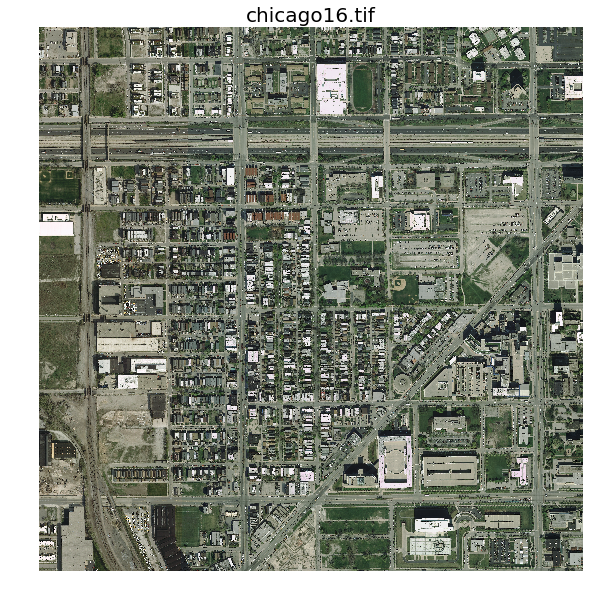

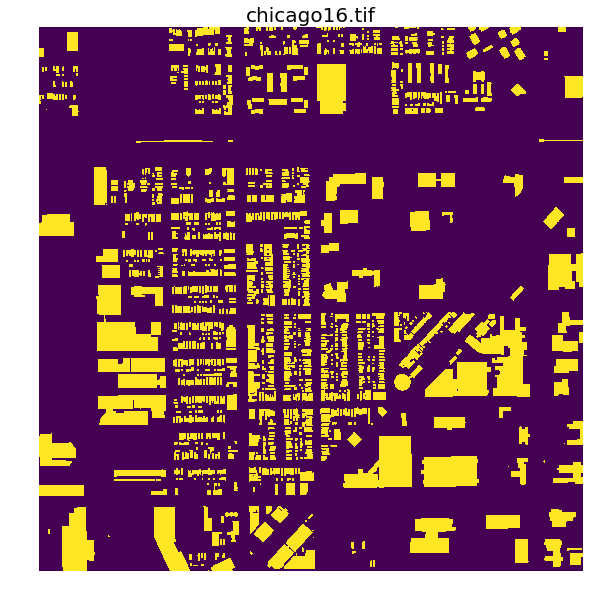

In [14]:
import imageio

plt.figure(figsize=(10,10))
plt.imshow( image )
plt.axis('off')
plt.title(image_test, fontsize=20)
plt.show

plt.figure(figsize=(10,10))
plt.imshow( mask )
plt.axis('off')
plt.title(image_test, fontsize=20)
plt.show

In [8]:
#Check the image sizes
#images_sizes=[]
#for image_id in dataset.image_ids:
#    images_sizes.append(dataset.load_image(image_id).shape)
#images_sizes

# checked (5000, 5000, 3)

In [9]:
#Check the mask sizes
#masks_sizes=[]
#for image_id in dataset.image_ids:
#    masks_sizes.append(dataset.load_mask(image_id).shape)
#masks_sizes

# checked (5000, 5000) taking values in {0,255}

Image([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Bounding box
Rather than using bounding box coordinates provided by the source datasets, we compute the bounding boxes from masks instead. This allows us to handle bounding boxes consistently regardless of the source dataset, and it also makes it easier to resize, rotate, or crop images because we simply generate the bounding boxes from the updates masks rather than computing bounding box transformation for each type of image transformation.

In [10]:
bbox = utils.extract_bboxes(mask)

TypeError: 'tuple' object cannot be interpreted as an integer